### Defining all of the constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Water (assuming it is the heat transfer fluid in the Internal Holding Tank) 

In [2]:
k_w = 0.67 
Cp_w = 4.1843
rho_w = 983.2
mu_w = 466.5
visc_w = mu_w/rho_w

##### The constants of the egg

In [3]:
k_e = 0.45
Cp_e = 3.63
rho_e = 1027

##### Viscosity of egg calculation

- Data used for 63 $^o$C treatment for 5min.
- Assumed Newtonian Fluid

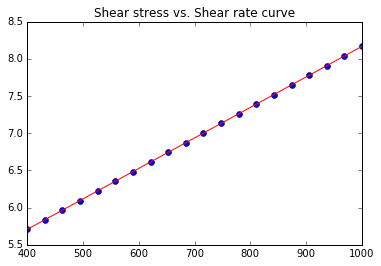

In [4]:
def data_fun(x):
    a = 4.067
    b = 0.0041
    c = 0
    return a + b*x

X = np.linspace(400,1000,20)
tau = data_fun(X)
plt.plot(X,tau,'o')
plt.plot(X,tau,'r')
plt.title('Shear stress vs. Shear rate curve')

mu_e = 0.0041
visc_e = mu_e/rho_e

##### Constant parameters of the system

In [5]:
#Used in both
L = 508.97
Ts = 60
Tinf = 65
Tf = (Ts+Tinf)/2
d = 95.5
D = d/1000
As = np.pi*D*L
Ac = np.pi/4*D**2
Te = 59
Ti = 0

# For the external calculation
Beta = 0.000522
g = 9.807
Pr_w = mu_w*Cp_w/k_w

#For the internal calculation
mass_flowrate = 35000/3600
V = mass_flowrate/rho_e
Pr_e = mu_e*Cp_e/k_e

##### Calculating the required heat to be added

In [6]:
Q = mass_flowrate * Cp_e * (Te - Ti)
print("The heat to added = ",Q," W")

The heat to added =  2082.208333333333  W


##### Calculating the External Convective Heat Transfer parameter $h_{ext}$

This was done by using Natuaral convection calculations and assuming that heat from the pipes do not influence one anothor

In [7]:
Ra_w = g*Beta*(Tinf-Ts)*D**3/visc_w**2 * Pr_w
Nu_w = (0.6 + (0.387*Ra_w**(1/6))/(1 + (0.559/Pr_w)**(9/16))**8/27)**2
h_ext = k_w/D*Nu_w
h_ext

2.61844164692167

##### Calculationg the Internal Convective Heat Transfer parameter $h_{int}$

This was done by using normal internal forced convection calculations.

In [8]:
Vavg = V/Ac
Re_e = Vavg*D/visc_e
if Re_e>2000:
    Nu_e = 0.023*Re_e**0.8*Pr_e**0.3
elif Re_e<2000:
    Nu_e = 3.66

h_int = Nu_e*k_e/D
h_int

155.12832947101703

##### Checking Ts

In [9]:
Ts_new = Tinf - Q/h_ext/As
Tout = Ts_new - Q/h_int/As
print ("The surface temp iteration value is: ",Ts_new," degC : should be 60 degC.")
print ("The temperature of the egg is: ", Tout," degC")

The surface temp iteration value is:  59.79242118689913  degC : should be 60 degC.
The temperature of the egg is:  59.70452143776661  degC


#### Transcient calculation assuming Ts=60 $^o$C

In [10]:
Tlm = (Ti-Tout)/np.log((Ts-Tout)/(Ts-Ti))
Areq = Q/h_int/Tlm
Lreq = Areq/np.pi/D
print('The required lenth is: ',Lreq,' m')

The required lenth is:  3.98156283638  m


#### Transient calculation assusimg a bath temp of T$_{inf}$ = 65 $^o$C

This is the more realistic calculation, as the surface temperature will surely not be 63 $^o$C since natural convection occurs.

In [11]:
U = 1/(1/h_int + 1/h_ext)
T1 = abs(Tinf-Ti)
T2 = abs(Tinf-Tout)
Tlm = (T1-T2)/np.log(T1/T2)
Areq = Q/U/Tlm
Lreq = Areq/np.pi/D
print ('The required transient length is: ', Lreq,' m')
print ('The required SS length is: ',V*60*5/(np.pi*D**2/4), ' m')

The required transient length is:  113.197541049  m
The required SS length is:  396.4785808323577  m


## Fitting in the windings

In [17]:
r = 1.2
ro = r - 0.2
Stack = 16
Length = 0
Height = Stack*D + 0.4

while ro>0.6:
    L1 = Stack*2*ro*np.pi
    ro -= D
    Length += L1

Volume = Height*np.pi*r**2
Volume_pipes = Length*np.pi/4*D**2
Volume_cooling = Volume - Volume_pipes
Length, Height, Volume, Volume_cooling

(406.6477530806628, 1.928, 8.722066516014413, 5.809237437331234)

### Heat loss out of the container

Assume there is no heat loss to the ground. There will therefore be heat loss via:
- The surface of the water to the air (natuaral convection)
- The side of the container(conduction, natuaral convection)
- Tinf was assumed to be 0 $^o$C
- Heat loss due to radiation was assumed to be neglegible

##### All of the necessary parameters

In [18]:
A_top = np.pi*r**2

Tinf = 0
Ts = 63
Tf = (Ts+Tinf)/2

k_brick = 0.72

Cp_air = 1006
mu_air = 1.729E-5
visc_air = 1.338E-5
k_air = 0.02364
Pr_air = 0.7362

Beta = 1/(Tf+273.15)
g = 9.807

##### Calculating the Convective Heat Transfer Coeffisient for natuaral convection (AIR)

In [19]:
Ra_air = g*Beta*(Ts-Tinf)*(2*r)**3/visc_air**2 * Pr_air
Nu_air = (0.6 + (0.387*Ra_air**(1/6))/(1 + (0.559/Pr_air)**(9/16))**8/27)**2
h_top = k_air/(2*r)*Nu_air
h_top

0.0036302499504440463

##### Calculating the heat loss at the top of the tank

- Assume that the top of the tank is well insulated with the lid placed on top

In [20]:
Q_loss_top = h_top*A_top*(Ts-Tinf)
print("The heat loss at the water to air interface is:",Q_loss_top," W")

The heat loss at the water to air interface is: 1.0346404236848825  W


##### Calculating heat loss through the sides of the tank by way of a resistance network

In [21]:
Wall_thickness = 0.23
A_sides = Height*2*r*np.pi

R_inside = 1/(h_ext*A_sides)
R_cond = Wall_thickness/(k_brick*A_sides)
R_outside = 1/(h_top*A_sides)
R_total = R_inside + R_cond + R_outside

Q_loss_sides = (Ts-Tinf)/R_total
print("The heat loss through the sides of the container is:",Q_loss_sides," W")

The heat loss through the sides of the container is: 3.3162012497823192  W


##### Heat loss due to radiation

In [26]:
sigma = 5.67E-8
epsilon = 0.8
Tsurr = 273
Ts = (60 - Q_loss_sides*(R_inside+R_cond))+273
Q_rad = sigma*epsilon*A_sides*(Ts**4-Tsurr**4)
Q_rad,Ts

(4429.8911086269945, 332.84000435996956)

##### Calculating the total heat loss (which is the amout of heat that needs to be added)

In [30]:
Q_total_added = Q_loss_sides + Q_rad #+ Q but the transcient heating will not be used
print('The total amount of heat to be added by way of the heating coil: ',str(Q_total_added/1000)[0:5], ' kW')

The total amount of heat to be added by way of the heating coil:  4.433  kW


# Possible drawbacks of this system

The drawbacks involve:
- Slow response of temperature regulation in case of control
- Transcient region will cool the liquid surrounding the pipes, leading to bad heat transfer
- Temperature throughout the tank will not be the same, due to unideal mixing
- Very long piping and therefore high construction cost

The positives involve:
- For the steadystate region there really is no better option
- The heat loss will not be radical due to still air surrounding the tank

Recommendations:
- It is recommended that the IHT stand in a building like structure in order to assure natuaral convection